<p align="center">
  <a>
    <img src="./figures/logo-hi-paris-retina.png" alt="Logo" width="280" height="180">
  </a>

  <h3 align="center">Data Science Bootcamp</h3>
</p>

Authors : Yann Berthelot, Florian Bettini, Laure-Amélie Colin

Dependencies with previous Labs
==========

This lab uses datasets from previous Labs:
- a cleaned dataset with all fires observed between 2011 and 2014 in the US `./data/2_clean/fires.csv`
- a cleaned dataset with external data (demographics, temperature and precipitation) `./data/2_clean/external_data.csv`

You can either:
- [preferred option] start over from the work that you produced
- or take pre-processed datasets located in `./data/9_helper_datasets`. In that case:
    - `./data/9_helper_datasets/external_data.csv` should be **copied** (not deleted) to `./data/2_clean/external_data.csv`
    - `./data/9_helper_datasets/fires.csv` should be **copied** (not deleted) to `./data/2_clean/fires.csv`

Feature Engineering
===================


### Why is it important ?
To undertand the objectives of this Lab, we first need to understand what is a machine learning model:

Building a machine learning model can be summarized in finding a link function $f$
 ($Y=f(X) + \epsilon$) which is most often the
result of error minimization : <p style="text-align: center;">$\sum_i E(Y_i,f(X_i))$</p> where
$(X_i,Y_i)$ is a list of pairs (features, target).

Consequently, features $(X_i)$ are key contributors to the success of a model.
The process of creating new features, that will be used to train a model, is called **feature engineering**



### What is Feature Engineering ?

Feature engineering is the process by which knowledge of data is used to construct explanatory variables, features, that can be used to train a predictive model. Engineering and selecting the correct features for a model will not only significantly improve its predictive power, but will also offer the flexibility to use less complex models that are faster to run and more easily understood.

### How is it done ?

#### Feature Engineering from Datetime
The timestamp in itself is not a feature that can be taken into consideration, but we can extract from it numerical features. Ex: day of the week.
```python
# to get the day of week from a datetime column in a DataFrame, you can use:
df["day_of_week"] = df["date"].dt.dayofweek

# to get the day of month from a datetime column in a DataFrame, you can use:
df["day"] = df["date"].dt.day

# to get the month from a datetime column in a DataFrame, you can use:
df["month"] = df["date"].dt.month
```
More documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html)

#### Feature Engineering from transformations
Feature transformations can include aggregating, or combining transforming attributes to create new features. Useful and relevant features will depend on the problem at hand but averages, sums, log or ratios can better expose trends to a model.

We can also transform a numerical feature into a categorical feature by cutting it into classes. This can be interesting to avoid the impact of outliers or to reduce the variance of the output variable.

##### Examples: 

```python
# sum 2 numerical columns (works similarly for all classical operators)
df['A+B'] = df['A'] + df['B']

# log transformation
df['var_transformed'] = df['var'].apply(np.log)

# polynomial transformation
df['var_transformed'] = df['var']**2
```

#### Focus on aggregations

### Data Encoding
Some algorithms can't work with categorical data directly. This means that categorical data must be converted to a numerical type. One way of doing so is to use One-Hot Encoding. It consists in transforming one column with N categorical data into N columns with 1 and 0. Each categorical value gets one column, and an observation has a 1 in the column if its original categorical value was its column (see example below)

<img src="./figures/onehotencoding.png" alt="Logo" width="400" height="180">

To perform a OneHotEncoding, you can use [pd.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

```python
# list of columns to encode using One-Hot-Encoding
columns_to_encode = ["var1", "var2"]

# encode those columns
encoded_data = pd.get_dummies(df[columns_to_encode], columns=columns_to_encode)

# add encoded columns to the data
df = pd.concat([df, encoded_data], axis=1)
```

##### **Focus on Aggregation**
One objective of this Lab is to provide an output dataset, with the correct format.
This requires to aggregate values. One can find below an example of aggregation, and additional documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html):

In [1]:
# first, we need to import pandas
import pandas as pd

# read file
fires = pd.read_csv("./data/1_raw/fires/fires_days_train.csv", parse_dates=["DISCOVERY_DATE"])
print("initial DataFrame")
display(fires)

# groupby operation
grouped = fires.groupby(
    ["DISCOVERY_DATE"]
).agg({
    "FIRE":[
        ("nb_states_with_fire", "sum"),
        ("percentage_states_impacted", "mean")
    ],
    "STATE":[
        ("total_nb_states", "count")
    ]
})

# keep one level for column names, and reset index
grouped.columns = grouped.columns.droplevel()
grouped = grouped.reset_index()

# display results
print("grouped DataFrame")
display(grouped)

initial DataFrame


,DISCOVERY_DATE,STATE,FIRE
0,2011-01-01,AK,0.0
1,2011-01-01,MN,0.0
2,2011-01-01,MI,0.0
3,2011-01-01,MO,1.0
4,2011-01-01,IL,0.0
...,...,...,...
94947,2015-12-31,PR,NaN
94948,2015-12-31,RI,NaN
94949,2015-12-31,VT,NaN
94950,2015-12-31,MA,NaN


grouped DataFrame


,DISCOVERY_DATE,nb_states_with_fire,percentage_states_impacted,total_nb_states
0,2011-01-01,12.0,0.230769,52
1,2011-01-02,9.0,0.173077,52
2,2011-01-03,12.0,0.230769,52
3,2011-01-04,19.0,0.365385,52
4,2011-01-05,12.0,0.230769,52
...,...,...,...,...
1821,2015-12-27,0.0,NaN,52
1822,2015-12-28,0.0,NaN,52
1823,2015-12-29,0.0,NaN,52
1824,2015-12-30,0.0,NaN,52


<img src="./figures/Groupby.png" alt="Logo" width="500" height="180">

<img src="./figures/input_output_groupby.png" alt="Logo" width="600" height="180">

Objectives of this lab
======

Use feature engineering to add new relevant features for your predictions.

##### **Information:**
- as a reminder, predictions will be based on a given state, at a given day. Ex: will there be a fire on the June 15th, 2015 in Arizona ?
- Consequently, all features should be expressed for a given state, at a given day.
- 2 datasets will be used as a starting point:
    - a cleaned dataset with all fires observed between 2011 and 2014 in the US `./data/2_clean/fires.csv`.
    - a cleaned dataset with external data (demographics, temperature and precipitation) `./data/2_clean/external_data.csv`
- most of the features that you will create will consist in manipulating pandas DataFrames (creating new columns, and aggregating a result for a given state at a given date).

##### Hypothesis for the model

**As an hypothesis** you can use all available external data (temperature, demographics, precipitation) for your predictions. For example, when you will predict if there is a fire in Arizone in June 15th, 2015, you can use the temperature that was observed in June 15th, 2015. This hypothesis reflects the fact we are confident in weather forecasts, and that the final model can be used few weeks before the prediction.

**However** you only have the history of fires until Dec. 2014. As a consequence, and because you will predict fires up until Dec 31st, 2015, you cannot create features that will use data (from this history of fires) 1 year before the prediction date. For example, if you need to predict the appearence of a fire in June 15th, 2015, you cannot use the history of fires after June 16th, 2014. This hypothesis reflects the needed time to centralize data accross all states and federal agencies, that can take up to 1 year.

<p align="center">
  <a>
    <img src="./figures/Feature_engineering.png" alt="Logo" width="600" height="300">
  </a>
</p>

##### **Guidelines for the Lab:**
- create features for the dataset `./data/2_clean/external_data.csv`
    - you can create/use the function `feature_engineering_external_data` to do so. New features can be:
        - **average maximum temperature** for all available cities inside a state, at a given date
        - **average minimum temperature** for all available cities inside a state, at a given date
        - **delta** between min and max temperatures
        - **average precipitation** for all available cities inside a state, at a given date
        - among an infinity of possibilities ! Be creative !
    - One row of the output DataFrame will correspond to a state, at a given date, with the computed features
- create features for the dataset `./data/2_clean/fires.csv`
    - you can create/use the function `feature_engineering_fires` to do so.
        - **number of fires in the state 2 years before**
        - **number of fires in the state, 1 year before, in a 1 month time window**. For example, if the prediction date is June 16th, 2014, you can compute the number of fires that occured between May 16th, 2013 and June 16th, 2013.
            - you can vary the time window to add more features to your model.
        - among an infinity of possibilities ! Be creative !
    - One row of the output DataFrame will correspond to a state, at a given date, with the computed features
- merge the above 2 datasets into a single one
    - One can use the function [pd.merge()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) to do so.
- clean this dataset (if needed) and save the result to `./data/3_input_model/input_model.csv`
- a final section in this notebook allows you to test the performance of your feature engineering, based on a simple random forest. It allows you to see the performance of your feature engineering, by plotting the features and their importance when doing predictions.

<p align="center">
  <a>
    <img src="./figures/UpToYou.png" alt="Logo" width="200" height="280">
  </a>
</p>

#### Libraries

In [3]:
!pip install xgboost

  Using cached xgboost-1.6.2-py3-none-manylinux2014_x86_64.whl (255.9 MB)

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from model import train_model_for_feature_engineering

#### Input files/variables

In [123]:
fires_days = pd.read_csv("./data/1_raw/fires/fires_days_train.csv", parse_dates=["DISCOVERY_DATE"])
external_data = pd.read_csv("./data/2_clean/external_data.csv", parse_dates=["Date"])
fires = pd.read_csv("./data/2_clean/fires.csv", parse_dates=["DISCOVERY_DATETIME"])

In [6]:
external_data.head()

,Date,tmax,tmin,prcp,Lat,Lon,Name,Name_lo,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size
0,2011-01-01,36.0,28.0,0.00,44.905,-123.0011,Salem,salem,Salem,OR,35.4,80839.0,83704.0,164543,9685.0,19668.0,2.69
1,2011-01-02,38.0,24.0,0.00,44.905,-123.0011,Salem,salem,Salem,OR,35.4,80839.0,83704.0,164543,9685.0,19668.0,2.69
2,2011-01-03,39.0,22.0,0.00,44.905,-123.0011,Salem,salem,Salem,OR,35.4,80839.0,83704.0,164543,9685.0,19668.0,2.69
3,2011-01-04,35.0,21.0,0.00,44.905,-123.0011,Salem,salem,Salem,OR,35.4,80839.0,83704.0,164543,9685.0,19668.0,2.69
4,2011-01-05,47.0,32.0,0.08,44.905,-123.0011,Salem,salem,Salem,OR,35.4,80839.0,83704.0,164543,9685.0,19668.0,2.69


#### Feature Engineering

##### External Data 

In [7]:
# groupby operation
external_data_grouped = external_data.groupby(["Date",'State']).agg({'tmax':'mean','tmin':'mean','prcp':'mean','Median Age':'mean','Male Population':'mean','Female Population':'mean','Total Population':'mean','Number of Veterans':'mean','Foreign-born':'mean','Average Household Size':'mean'}).reset_index()


In [8]:
external_data_grouped['delta_temp'] = external_data_grouped['tmax'] - external_data_grouped['tmin']

In [9]:
external_data_grouped.head()

,Date,State,tmax,tmin,prcp,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,delta_temp
0,2011-01-01,AL,67.000000,48.000000,1.140000,36.775000,94935.750000,104793.250000,199729.000000,14185.750000,9380.000000,2.300000,19.000000
1,2011-01-01,AR,47.666667,26.666667,0.000000,34.700000,58669.666667,61359.333333,120029.000000,6477.666667,11013.000000,2.413333,21.000000
2,2011-01-01,AZ,45.250000,16.250000,0.000000,31.175000,283312.000000,281472.250000,564784.250000,30354.750000,101627.500000,2.632500,29.000000
3,2011-01-01,CA,50.666667,35.222222,0.098889,33.511111,409630.888889,420922.111111,830553.000000,28899.111111,258767.444444,3.002222,15.444444
4,2011-01-01,CO,18.666667,-9.000000,0.000000,35.500000,207438.666667,208736.666667,416175.333333,28881.000000,50706.666667,2.416667,27.666667


##### Fires Data 


In [88]:
#Créer la durée du feu en minutes
fires.CONT_DATETIME = pd.to_datetime(fires.CONT_DATETIME)
fires['DURATION_FIRE_MIN'] = fires.CONT_DATETIME - fires.DISCOVERY_DATETIME
fires['DURATION_FIRE_MIN'] = fires.DURATION_FIRE_MIN.dt.seconds / 60

In [89]:
fires.head()

,FOD_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_TIME,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,CAUSE_DESCR,CAUSE_CODE,DISCOVERY_DATE_display,DISCOVERY_DATETIME,CONT_DATE_display,DURATION_FIRE,CONT_DATETIME,DURATION_FIRE_MIN
0,20020059,VFD BEAR CREEK #1,2011,12:01,16:01,0.1,A,60.246389,-149.349444,AK,accidental,1,2011-03-21 00:00:00,2011-03-21 12:01:00,2011-03-21 00:00:00,0,2011-03-21 16:01:00,240.0
1,20020060,CPR LNDG ORGANIC DMP,2011,18:01,11:05,0.1,A,60.475833,-149.752500,AK,accidental,1,2011-04-15 00:00:00,2011-04-15 18:01:00,2011-04-18 00:00:00,3,2011-04-18 11:05:00,1024.0
2,20020061,TOKLAT WAY DEBRIS,2011,12:05,13:03,0.1,A,60.514444,-149.467500,AK,accidental,1,2011-05-11 00:00:00,2011-05-11 12:05:00,2011-05-11 00:00:00,0,2011-05-11 13:03:00,58.0
3,20020062,LAWING DRIVE,2011,12:02,12:05,0.1,A,60.399722,-149.360833,AK,accidental,1,2011-05-13 00:00:00,2011-05-13 12:02:00,2011-05-13 00:00:00,0,2011-05-13 12:05:00,3.0
4,20020063,RUSSIAN RIVER TRAIL,2011,10:02,12:03,0.1,A,60.467500,-149.973056,AK,accidental,1,2011-07-17 00:00:00,2011-07-17 10:02:00,2011-07-17 00:00:00,0,2011-07-17 12:03:00,121.0


In [124]:
fires_grouped = fires.groupby(['DISCOVERY_DATETIME','STATE']).agg({'FOD_ID':'count'}).reset_index()
fires_grouped.head()

,DISCOVERY_DATETIME,STATE,FOD_ID
0,2011-01-01 00:00:00,CA,1
1,2011-01-01 00:00:00,FL,1
2,2011-01-01 00:00:00,MO,1
3,2011-01-01 00:01:00,AL,1
4,2011-01-01 00:01:00,GA,1


In [125]:
fires_grouped['DISCOVERY_DATETIME'] = fires_grouped['DISCOVERY_DATETIME'].dt.date

In [126]:
fires_grouped

,DISCOVERY_DATETIME,STATE,FOD_ID
0,2011-01-01,CA,1
1,2011-01-01,FL,1
2,2011-01-01,MO,1
3,2011-01-01,AL,1
4,2011-01-01,GA,1
...,...,...,...
206535,2014-12-31,AR,1
206536,2014-12-31,NY,1
206537,2014-12-31,AR,1
206538,2014-12-31,NY,1


In [19]:
fires_grouped['DISCOVERY_DATETIME'].dt.year

0         2011
1         2011
2         2011
3         2011
4         2011
          ... 
206535    2014
206536    2014
206537    2014
206538    2014
206539    2014
Name: DISCOVERY_DATETIME, Length: 206540, dtype: int64

In [26]:
from datetime import datetime, timedelta


In [127]:
fires_grouped['date_2_years_before'] = fires_grouped['DISCOVERY_DATETIME']-timedelta(days=730)

In [128]:
fires_grouped = fires_grouped.rename(columns={"nb_fires_last_year": "nb_fires_2_years_before"})


In [ ]:
fires_grouped[fires_grouped['DISCOVERY_DATETIME'].dt.year == 2014]

In [52]:
fires_grouped_bis = fires_grouped.copy()

In [57]:
fires_grouped.DISCOVERY_DATETIME.dt.date

0         2011-01-01
1         2011-01-01
2         2011-01-01
3         2011-01-01
4         2011-01-01
             ...    
206535    2014-12-31
206536    2014-12-31
206537    2014-12-31
206538    2014-12-31
206539    2014-12-31
Name: DISCOVERY_DATETIME, Length: 206540, dtype: object

In [131]:
fires_grouped

,DISCOVERY_DATETIME,STATE,FOD_ID,date_2_years_before
0,2011-01-01,CA,1,2009-01-01
1,2011-01-01,FL,1,2009-01-01
2,2011-01-01,MO,1,2009-01-01
3,2011-01-01,AL,1,2009-01-01
4,2011-01-01,GA,1,2009-01-01
...,...,...,...,...
206535,2014-12-31,AR,1,2012-12-31
206536,2014-12-31,NY,1,2012-12-31
206537,2014-12-31,AR,1,2012-12-31
206538,2014-12-31,NY,1,2012-12-31


In [58]:
fires_grouped_final = fires_grouped_bis.merge(fires_grouped, left_on='date_2_years_before', right_on='DISCOVERY_DATETIME')

In [84]:
fires_grouped.to_csv('fires_grouped.csv',index=False)

In [140]:
fires_grouped.groupby(['STATE'])[['FOD_ID']].transform(lambda x:x.shift(730))

,FOD_ID
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
206535,2.0
206536,1.0
206537,2.0
206538,1.0


In [143]:
# number of fires in the state 2 years before
fires_grouped.nb_fires_2_years_before = 0

x = fires_grouped.groupby(['STATE'])[['FOD_ID']].transform(lambda x:x.shift(730))

fires_grouped['nb_fires_2_years_before'] = x


In [138]:
# avg number of fires in 1 week in the state 2 years before
fires_grouped['avg_nb_fires_2_years_before_over_1_week'] = 0

y= fires_grouped.groupby(['STATE'])[['FOD_ID']].transform(lambda x:x.shift(730).rolling(7).mean())

fires_grouped.avg_nb_fires_2_years_before_over_1_week = y

In [144]:
fires_grouped

,DISCOVERY_DATETIME,STATE,FOD_ID,date_2_years_before,avg_nb_fires_2_years_before_over_1_week,nb_fires_2_years_before
0,2011-01-01,CA,1,2009-01-01,NaN,NaN
1,2011-01-01,FL,1,2009-01-01,NaN,NaN
2,2011-01-01,MO,1,2009-01-01,NaN,NaN
3,2011-01-01,AL,1,2009-01-01,NaN,NaN
4,2011-01-01,GA,1,2009-01-01,NaN,NaN
...,...,...,...,...,...,...
206535,2014-12-31,AR,1,2012-12-31,1.571429,2.0
206536,2014-12-31,NY,1,2012-12-31,1.142857,1.0
206537,2014-12-31,AR,1,2012-12-31,1.714286,2.0
206538,2014-12-31,NY,1,2012-12-31,1.000000,1.0


In [ ]:
fires_grouped.groupby(['STATE'])[['FOD_ID']].transform(lambda x:x.rolling(7).mean()).head(40)

,FOD_ID
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [148]:
fires_grouped['nb_fires_2_years_before']=fires_grouped['nb_fires_2_years_before'].fillna(fires_grouped.groupby(['STATE'])[['FOD_ID']].transform(lambda x:x.rolling(7).mean())['FOD_ID'])
fires_grouped[fires_grouped['STATE']=='FL'].head(10)

,DISCOVERY_DATETIME,STATE,FOD_ID,date_2_years_before,avg_nb_fires_2_years_before_over_1_week,nb_fires_2_years_before
1,2011-01-01,FL,1,2009-01-01,NaN,NaN
7,2011-01-01,FL,1,2009-01-01,NaN,NaN
13,2011-01-01,FL,1,2009-01-01,NaN,NaN
15,2011-01-01,FL,1,2009-01-01,NaN,NaN
18,2011-01-01,FL,1,2009-01-01,NaN,NaN
20,2011-01-01,FL,1,2009-01-01,NaN,NaN
22,2011-01-01,FL,1,2009-01-01,NaN,1.000000
24,2011-01-01,FL,1,2009-01-01,NaN,1.000000
26,2011-01-01,FL,1,2009-01-01,NaN,1.000000
29,2011-01-01,FL,3,2009-01-01,NaN,1.285714


In [149]:
fires_grouped['nb_fires_2_years_before']=fires_grouped['nb_fires_2_years_before'].fillna(fires_grouped['FOD_ID'])
fires_grouped

,DISCOVERY_DATETIME,STATE,FOD_ID,date_2_years_before,avg_nb_fires_2_years_before_over_1_week,nb_fires_2_years_before
0,2011-01-01,CA,1,2009-01-01,NaN,1.0
1,2011-01-01,FL,1,2009-01-01,NaN,1.0
2,2011-01-01,MO,1,2009-01-01,NaN,1.0
3,2011-01-01,AL,1,2009-01-01,NaN,1.0
4,2011-01-01,GA,1,2009-01-01,NaN,1.0
...,...,...,...,...,...,...
206535,2014-12-31,AR,1,2012-12-31,1.571429,2.0
206536,2014-12-31,NY,1,2012-12-31,1.142857,1.0
206537,2014-12-31,AR,1,2012-12-31,1.714286,2.0
206538,2014-12-31,NY,1,2012-12-31,1.000000,1.0


In [150]:
fires_grouped['avg_nb_fires_2_years_before_over_1_week']=fires_grouped['avg_nb_fires_2_years_before_over_1_week'].fillna(fires_grouped.groupby(['STATE'])[['FOD_ID']].transform(lambda x:x.rolling(7).mean())['FOD_ID'])
fires_grouped[fires_grouped['STATE']=='FL'].head(10)

,DISCOVERY_DATETIME,STATE,FOD_ID,date_2_years_before,avg_nb_fires_2_years_before_over_1_week,nb_fires_2_years_before
1,2011-01-01,FL,1,2009-01-01,NaN,1.000000
7,2011-01-01,FL,1,2009-01-01,NaN,1.000000
13,2011-01-01,FL,1,2009-01-01,NaN,1.000000
15,2011-01-01,FL,1,2009-01-01,NaN,1.000000
18,2011-01-01,FL,1,2009-01-01,NaN,1.000000
20,2011-01-01,FL,1,2009-01-01,NaN,1.000000
22,2011-01-01,FL,1,2009-01-01,1.000000,1.000000
24,2011-01-01,FL,1,2009-01-01,1.000000,1.000000
26,2011-01-01,FL,1,2009-01-01,1.000000,1.000000
29,2011-01-01,FL,3,2009-01-01,1.285714,1.285714


In [154]:
fires_grouped['avg_nb_fires_2_years_before_over_1_week']=fires_grouped['avg_nb_fires_2_years_before_over_1_week'].fillna(fires_grouped['FOD_ID'])
fires_grouped

,DISCOVERY_DATETIME,STATE,FOD_ID,date_2_years_before,avg_nb_fires_2_years_before_over_1_week,nb_fires_2_years_before
0,2011-01-01,CA,1,2009-01-01,1.000000,1.0
1,2011-01-01,FL,1,2009-01-01,1.000000,1.0
2,2011-01-01,MO,1,2009-01-01,1.000000,1.0
3,2011-01-01,AL,1,2009-01-01,1.000000,1.0
4,2011-01-01,GA,1,2009-01-01,1.000000,1.0
...,...,...,...,...,...,...
206535,2014-12-31,AR,1,2012-12-31,1.571429,2.0
206536,2014-12-31,NY,1,2012-12-31,1.142857,1.0
206537,2014-12-31,AR,1,2012-12-31,1.714286,2.0
206538,2014-12-31,NY,1,2012-12-31,1.000000,1.0


In [155]:
fires_grouped.isna().sum()/len(fires_grouped)

DISCOVERY_DATETIME                         0.0
STATE                                      0.0
FOD_ID                                     0.0
date_2_years_before                        0.0
avg_nb_fires_2_years_before_over_1_week    0.0
nb_fires_2_years_before                    0.0
dtype: float64

In [156]:
fires_grouped.to_csv('fires_grouped.csv',index=False)

## "Simple" evaluation of your feature engineering
Here you can train a random forest using the features you created as some way to benchmark different feature engineering. Actual model selection and tuning will be done during the next lab.


Step 1
f1-micro: 0.7523709167544784
f1-macro: 0.7419394360790874
f1-weighted: 0.7505084126925899
accuracy: 0.7523709167544784

Step 2
f1-micro: 0.7923428170003513
f1-macro: 0.7813558844346746
f1-weighted: 0.7932311368380024
accuracy: 0.7923428170003513

Step 3
f1-micro: 0.7770987003863716
f1-macro: 0.7664617119174943
f1-weighted: 0.7806665381907777
accuracy: 0.7770987003863716
f1-micro: 0.8029108869272804
f1-macro: 0.7832424793054715
f1-weighted: 0.80208407962973
accuracy: 0.8029108869272804


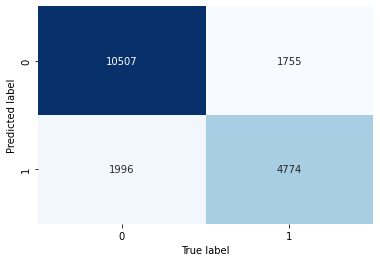

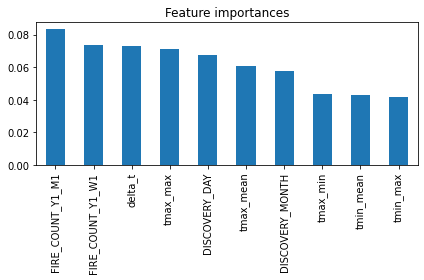

In [6]:
data = fires_days # name of your final DataFrame, after your feature engineering
min_year_pred = "2015-01-01"
target_col = "FIRE"
ratio = 0.75

# split train and prediction datasets
data = data[data["DISCOVERY_DATE"] < min_year_pred].copy() # get train data (features and target values)
data[target_col] = data[target_col].astype("int")
train_model_for_feature_engineering(data, target_col, ratio=ratio)